In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = [8, 6]
from matplotlib.colors import LogNorm


In [2]:
import xray_emissivity

In [7]:
xray = xray_emissivity.XrayEmissivity(energy_range=[0.01,2.0], num_ebins=101)

In [8]:
xray.tabulate_specific_xray_emissivity()

# Save table as file "etable.hdf5"
xray.save_emissivity_table("etable")

Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines wi

Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Will not thermally broaden lines
Will thermally broaden lines wi

In [9]:
# Read table from file

xray.read_emissivity_table('etable.hdf5')
print (xray.emin)

0.01


In [11]:
# Set up interpolation. Need to run this step! 
xray.setup_interpolated_emissivity_table()

In [12]:
emiss = xray.return_interpolated_emissivity(0.018, 0.2)
print (emiss)

1.0699834765030982e-13


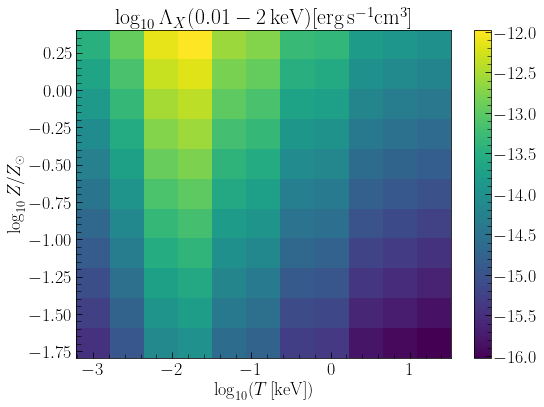

In [10]:
# Plot showing the emissivity table

ltbins = np.log10(xray.tbins)
lzbins = np.log10(xray.zbins)
dx = (ltbins[1]-ltbins[0])/2.
dy = (lzbins[1]-lzbins[0])/2.
extent = [ltbins[0]-dx, ltbins[-1]+dx, lzbins[0]-dy, lzbins[-1]+dy]

fig, ax= plt.subplots()

c = ax.imshow(np.log10(xray.etable.T), origin="lower", extent=extent, aspect='auto')
plt.colorbar(c)

ax.set_xlabel(r'$\log_{10}(T\,[{\rm keV}])$')
ax.set_ylabel(r'$\log_{10}Z/Z_\odot$')
ax.set_title(r'$\log_{10}\Lambda_{X}(0.01-2\,{\rm keV})[{\rm erg\,s^{-1}cm^3}]$')

plt.tight_layout()
plt.show()